In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os

DATA_ROOT = "/content"   # upload .npy to session storage

# load vector
X = np.load(os.path.join(DATA_ROOT, "X_vectors.npy"))
y = np.load(os.path.join(DATA_ROOT, "y_labels.npy"))

X = X.astype("float32")
y = y.astype("int8")

print("After dtype conversion:")
print("X:", X.shape, X.dtype)
print("y:", y.shape, y.dtype)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42,
)

print("Train:", X_train.shape)
print("Test:", X_test.shape)



After dtype conversion:
X: (1000, 8373) float32
y: (1000,) int8
Train: (800, 8373)
Test: (200, 8373)


In [ ]:
!pip install -q lightgbm

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 4, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/main.py", line 11, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners import open_spinner
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/spinners.py", line 9, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/util

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
# Build a Binary Classification LightGBM Model
lgbm = LGBMClassifier(
    n_estimators=800,      # tree number
    learning_rate=0.05,
    num_leaves=64,
    objective="binary",
    class_weight="balanced",   # Automatic weighting when categories are imbalanced
    n_jobs=-1,                 # Use all CPU
)

print("Training LightGBM...")
lgbm.fit(X_train, y_train)

print("Done.")

Training LightGBM...
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3141
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 785
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


=== LightGBM Confusion Matrix ===
[[90 10]
 [ 4 96]]


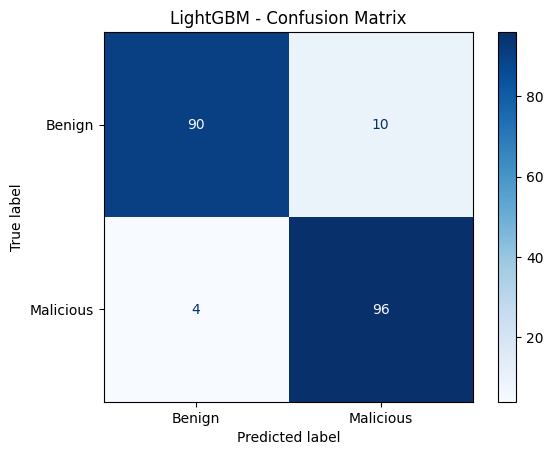


=== LightGBM Classification Report ===
              precision    recall  f1-score   support

      Benign     0.9574    0.9000    0.9278       100
   Malicious     0.9057    0.9600    0.9320       100

    accuracy                         0.9300       200
   macro avg     0.9316    0.9300    0.9299       200
weighted avg     0.9316    0.9300    0.9299       200

LightGBM ROC-AUC: 0.9875


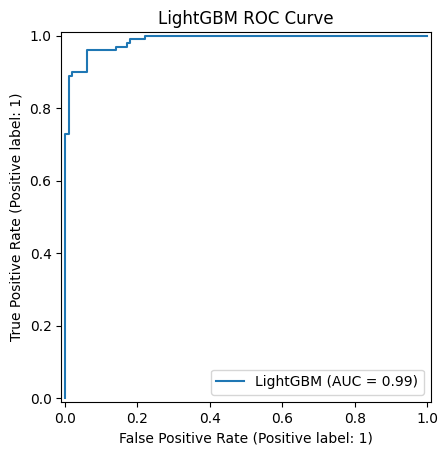

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Prediction Label
y_pred_lgbm = lgbm.predict(X_test)

# To calculate AUC, we need to use the predicted probability
y_proba_lgbm = lgbm.predict_proba(X_test)[:, 1]

print("=== LightGBM Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred_lgbm)
print(cm)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Benign", "Malicious"]
)
disp.plot(cmap="Blues")
plt.title("LightGBM - Confusion Matrix")
plt.show()

print("\n=== LightGBM Classification Report ===")
print(
    classification_report(
        y_test,
        y_pred_lgbm,
        target_names=["Benign", "Malicious"],
        digits=4,
    )
)

auc_lgbm = roc_auc_score(y_test, y_proba_lgbm)
print(f"LightGBM ROC-AUC: {auc_lgbm:.4f}")

# ROC curve
RocCurveDisplay.from_predictions(
    y_test,
    y_proba_lgbm,
    name="LightGBM",
)
plt.title("LightGBM ROC Curve")
plt.show()


In [ ]:
import numpy as np

# Load Feature List
feature_list = np.load("feature_list.npy", allow_pickle=True)
print("Feature list loaded:", len(feature_list))

importances = lgbm.feature_importances_
top_idx = np.argsort(importances)[-30:]

for i in reversed(top_idx):
    print(importances[i], feature_list[i])

Feature list loaded: 8373
624 Permission: android.permission.SEND_SMS
598 Permission: android.permission.READ_PHONE_STATE
495 Permission: android.permission.INTERNET
412 API: java.io.InputStreamReader
306 API: android.os.PowerManager
304 API: android.widget.ArrayAdapter
264 Intent: android.intent.category.LAUNCHER
205 Permission: android.permission.RECEIVE_BOOT_COMPLETED
202 API: java.lang.Process
200 API: java.util.TimerTask
193 API: android.os.SystemClock
192 Permission: android.permission.ACCESS_WIFI_STATE
188 API: android.preference.PreferenceManager
181 Permission: android.permission.WRITE_EXTERNAL_STORAGE
180 API: android.net.wifi
166 Permission: android.permission.RECEIVE_SMS
164 API: android.util.DisplayMetrics
162 API: android.content.DialogInterface
157 Permission: android.permission.ACCESS_NETWORK_STATE
154 API: android.telephony.SmsManager
147 API: android.telephony.gsm
143 API: java.io.FileReader
141 API: android.app.ActivityManager
132 API: java.lang.IllegalStateException

In [ ]:
from sklearn.svm import LinearSVC

#C can be increased or decreased to control the regularization strength.
svm_clf = LinearSVC(
    C=1.0,
    class_weight="balanced",
)

print("Training LinearSVC...")
svm_clf.fit(X_train, y_train)
print("Done.")


Training LinearSVC...
Done.


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


=== LinearSVC Confusion Matrix ===
[[83 17]
 [14 86]]


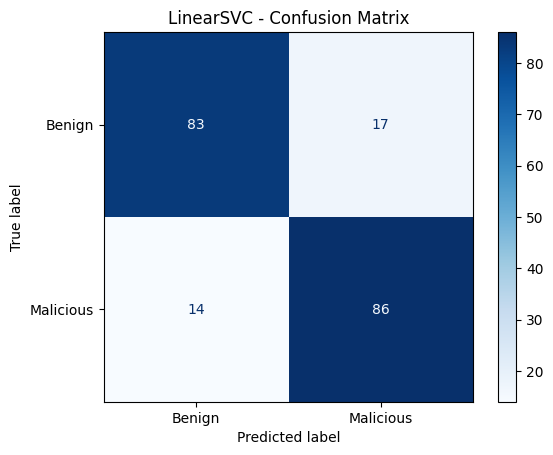


=== LinearSVC Classification Report ===
              precision    recall  f1-score   support

      Benign     0.8557    0.8300    0.8426       100
   Malicious     0.8350    0.8600    0.8473       100

    accuracy                         0.8450       200
   macro avg     0.8453    0.8450    0.8450       200
weighted avg     0.8453    0.8450    0.8450       200

LinearSVC ROC-AUC: 0.9095


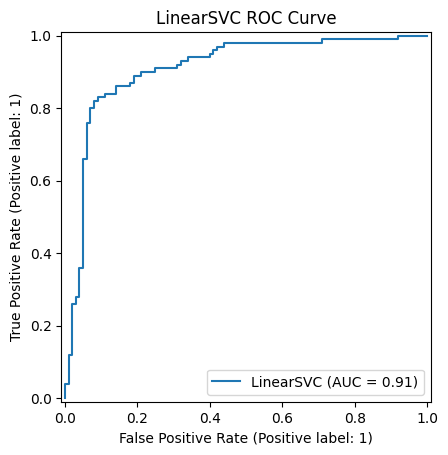

In [ ]:
# Prediction Label
y_pred_svm = svm_clf.predict(X_test)

print("=== LinearSVC Confusion Matrix ===")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_svm,
    display_labels=["Benign", "Malicious"]
)
disp.plot(cmap="Blues")
plt.title("LinearSVC - Confusion Matrix")
plt.show()

print("\n=== LinearSVC Classification Report ===")
print(
    classification_report(
        y_test,
        y_pred_svm,
        target_names=["Benign", "Malicious"],
        digits=4,
    )
)

# AUC: Obtain the “score” using the decision_function
scores_svm = svm_clf.decision_function(X_test)
auc_svm = roc_auc_score(y_test, scores_svm)
print(f"LinearSVC ROC-AUC: {auc_svm:.4f}")

RocCurveDisplay.from_predictions(
    y_test,
    scores_svm,
    name="LinearSVC",
)
plt.title("LinearSVC ROC Curve")
plt.show()
